In [0]:
import imageio # This is for manipulating images
import numpy # I AM A MATLAB USER SORRY!!
import os

import matplotlib.pyplot as plt
import cv2

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -uq "/content/drive/My Drive/Colab Notebooks/TOPIMG.zip" 

KeyboardInterrupt: ignored

In [0]:
# Define some lists to store data to
x = []
y = []


In [0]:
def change_res(img):
  #scale_percent = 60 # percent of original size
  cropped = image[70:170, 440:540]
  width = 64
  height = 64
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized


In [0]:
K = numpy.arange(1,25670)
numpy.random.shuffle(K)
imp = K
print(imp)

[13802 21378  6873 ...  4358 12906  6637]


In [0]:
# Read all 3d-printed images
for i in imp:
    i_mod = "{:06d}".format(i)
    image = imageio.imread("images/3d_printed/"+i_mod+".jpg", as_gray=False, pilmode="RGB")
    image = change_res(image)
    x.append(image/255)
    y.append(1)

In [0]:
# Read all not 3d-printed images
numpy.random.shuffle(imp)
for i in imp:
    i_mod = "{:06d}".format(i)
    image = imageio.imread("images/not_3d_printed/"+i_mod+".jpg", as_gray=False, pilmode="RGB")
    image = change_res(image)
    x.append(image/255)
    y.append(0)

Each image is 64×64


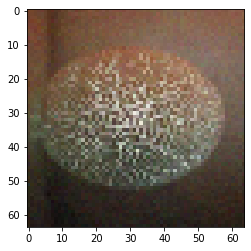

In [0]:
# Print out important things
image_height, image_width, rgb = image.shape
print("Each image is " + str(image_height) + "×" + str(image_width))
plt.imshow(x[100])

In [0]:
x = numpy.array(x) # Make the data into a numpy array for ease of use
y = numpy.array(y) # Make the data into a numpy array for ease of use
y.astype('int')
print(x.shape)
input_shape = image.shape
print(input_shape)
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
Input_train, Input_test, Target_train, Target_test = train_test_split(x,y, test_size=0.2)


(51338, 64, 64, 3)
(64, 64, 3)


In [0]:
# Importing tensorflow 2.x as a backend for keras
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3),activation='tanh',input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3,3),activation='tanh'))
model.add(Conv2D(32, kernel_size=(3,3),activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 60, 60, 16)        1168      
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 58, 58, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 11, 11, 128)     

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepwath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)
model.fit(x=Input_train,y=Target_train, epochs=20,validation_data=(Input_test,Target_test),callbacks=[cp_callback])

Train on 41070 samples, validate on 10268 samples
Epoch 1/20
41070/41070 [==============================] - 27s 656us/sample - loss: 0.5436 - accuracy: 0.6972 - val_loss: 0.4512 - val_accuracy: 0.7598
Epoch 2/20
41070/41070 [==============================] - 26s 634us/sample - loss: 0.4347 - accuracy: 0.7758 - val_loss: 0.4019 - val_accuracy: 0.8017
Epoch 3/20
41070/41070 [==============================] - 26s 631us/sample - loss: 0.3908 - accuracy: 0.8006 - val_loss: 0.3765 - val_accuracy: 0.8091
Epoch 4/20
41070/41070 [==============================] - 25s 616us/sample - loss: 0.3580 - accuracy: 0.8216 - val_loss: 0.3958 - val_accuracy: 0.8053
Epoch 5/20
41070/41070 [==============================] - 26s 623us/sample - loss: 0.3086 - accuracy: 0.8544 - val_loss: 0.3166 - val_accuracy: 0.8500
Epoch 6/20
41070/41070 [==============================] - 26s 634us/sample - loss: 0.2534 - accuracy: 0.8873 - val_loss: 0.2883 - val_accuracy: 0.8717
Epoch 7/20
41070/41070 [====================

In [0]:
# predicting tricky images: 3D Printed
for i in range(1,11):
  filename = "Test" + str(i) + "3D.jpg"
  image = imageio.imread("Testing Images/3D/" + filename, as_gray=False, pilmode="RGB")
  #print(image.shape)
  image = change_res(image)
  #plt.imshow(image)
  image = numpy.array(image)
  pred = model.predict(image.reshape(1,64,64,3))
  measure = pred.argmax()
  print(measure)
  if measure == 1:
    msg = "3D Printed"
  else:
    msg = "Not 3D Printed"

  print("The part in image(" + filename + ") is predict to be " + msg + ", but it's actually 3D Printed")

1
The part in image(Test13D.jpg) is predict to be 3D Printed, but it's actually 3D Printed
1
The part in image(Test23D.jpg) is predict to be 3D Printed, but it's actually 3D Printed
0
The part in image(Test33D.jpg) is predict to be Not 3D Printed, but it's actually 3D Printed
1
The part in image(Test43D.jpg) is predict to be 3D Printed, but it's actually 3D Printed
1
The part in image(Test53D.jpg) is predict to be 3D Printed, but it's actually 3D Printed
1
The part in image(Test63D.jpg) is predict to be 3D Printed, but it's actually 3D Printed
0
The part in image(Test73D.jpg) is predict to be Not 3D Printed, but it's actually 3D Printed
0
The part in image(Test83D.jpg) is predict to be Not 3D Printed, but it's actually 3D Printed
0
The part in image(Test93D.jpg) is predict to be Not 3D Printed, but it's actually 3D Printed
1
The part in image(Test103D.jpg) is predict to be 3D Printed, but it's actually 3D Printed


In [0]:
# predicting tricky images: 3D Printed
for i in range(1,11):
  filename = "Test" + str(i) + "N.jpg"
  image = imageio.imread("Testing Images/Not 3D/" + filename, as_gray=False, pilmode="RGB")
  #print(image.shape)
  image = change_res(image)
  #plt.imshow(image)
  image = numpy.array(image)
  pred = model.predict(image.reshape(1,64,64,3))
  measure = pred.argmax()
  print(measure)
  if measure == 1:
    msg = "3D Printed"
  else:
    msg = "Not 3D Printed"

  print("The part in image(" + filename + ") is predict to be " + msg + ", but it's actually not 3D Printed")

1
The part in image(Test1N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
1
The part in image(Test2N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
1
The part in image(Test3N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
1
The part in image(Test4N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
1
The part in image(Test5N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
1
The part in image(Test6N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
0
The part in image(Test7N.jpg) is predict to be Not 3D Printed, but it's actually not 3D Printed
1
The part in image(Test8N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
1
The part in image(Test9N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
1
The part in image(Test10N.jpg) is predict to be 3D Printed, but it's actually not 3D Printed
